#                                                              Basic Music Player

In [1]:
import os
from tkinter import*
import tkinter.messagebox
from pygame import mixer
from mutagen.mp3 import MP3
import time
import threading
from tkinter import filedialog
root=Tk()
menubar=Menu(root)
root.config(menu=menubar)
subMenu=Menu(menubar,tearoff=0)
def browse_file():
    global filename
    filename=filedialog.askopenfilename()
menubar.add_cascade(label="File",menu=subMenu)
subMenu.add_command(label="Open",command=browse_file)
subMenu.add_command(label="Exit",command=root.destroy)
def about_us():
    tkinter.messagebox.showinfo("MUPY","this is the music player based on python which also form a pitch map of your voice comparetively with the original track")
subMenu=Menu(menubar,tearoff=0)
menubar.add_cascade(label="Help",menu=subMenu)
subMenu.add_command(label="About us",command=about_us)

mixer.init()

root.title("MUPY")
root.iconbitmap("C:/Users/HP/Desktop/music player @mupy/images/music.ico")

filelabel=Label(root,text="Lets play something good!!!!")
filelabel.pack()

lengthlabel=Label(root,text="Total Length:--:--")
lengthlabel.pack(pady=5)

currenttimelabel=Label(root,text="Current Time:--:--",relief=GROOVE)
currenttimelabel.pack()

def show_details():
    filelabel["text"]="Playing "+"-"+os.path.basename(filename)
    
    file_data=os.path.splitext(filename)
    if file_data[1]=='.mp3':
        audio=MP3(filename)
        total_length=audio.info.length

    else:
        a=mixer.Sound(filename)
        total_length=a.get_length()
    mins,secs=divmod(total_length,60)
    mins=round(mins)
    secs=round(secs)
    timeformat='{:02d}:{:02d}'.format(mins,secs)
    lengthlabel["text"]="Total length"+"-"+timeformat


    t1=threading.Thread(target=start_count,args=(total_length,))
    t1.start()

def start_count(t):
    global paused
    current_time=0
    while current_time<=t and mixer.music.get_busy():
        if paused:
            continue
        else:
            mins,secs=divmod(current_time,60)
            mins=round(mins)
            secs=round(secs)
            timeformat='{:02d}:{:02d}'.format(mins,secs)
            currenttimelabel["text"]="Current Time"+"-"+timeformat
            time.sleep(1)
            current_time+=1

def play_Music():
    global paused
    #this checks whether the paused is initialised or not
    if paused:
        mixer.music.unpause()
        statusbar["text"]="Music Resumed"
        paused=FALSE
    else:
        try:
            mixer.music.load(filename)
            mixer.music.play()
            statusbar["text"]="Playing music"+"-"+os.path.basename(filename)
            show_details()
        except:
            tkinter.messagebox.showerror("File not found","MUPY could not find the file check again")

def play_Music():
    global paused
    #this checks whether the paused is initialised or not
    if paused:
        mixer.music.unpause()
        statusbar["text"]="Music Resumed"
        paused=FALSE
    else:
        try:
            mixer.music.load(filename)
            mixer.music.play()
            statusbar["text"]="Playing music"+"-"+os.path.basename(filename)
            show_details()
        except:
            tkinter.messagebox.showerror("File not found","MUPY could not find the file check again")

def play_Music():
    global paused
    #this checks whether the paused is initialised or not
    if paused:
        mixer.music.unpause()
        statusbar["text"]="Music Resumed"
        paused=FALSE
    else:
        try:
            mixer.music.load(filename)
            mixer.music.play()
            statusbar["text"]="Playing music"+"-"+os.path.basename(filename)
            show_details()
        except:
            tkinter.messagebox.showerror("File not found","MUPY could not find the file check again")

def set_vol(val):
    volume=int(val)/100
    mixer.music.set_volume(volume)#set_get value from 0 to 1
muted=FALSE

def mute_Music():
    global muted
    if muted:
        mixer.music.set_volume(0.7)
        volumeBtn.configure(image=volumephoto)
        scale.set(70)
        muted=FALSE

    else:#mute
        mixer.music.set_volume(0)
        volumeBtn.configure(image=mutephoto)
        scale.set(0)
        muted=TRUE

middleframe=Frame(root)
middleframe.pack(pady=30,padx=30)


playphoto=PhotoImage(file="C:/Users/HP/Desktop/music player @mupy/images/play.png")
playBtn=Button(middleframe,image=playphoto ,command=play_Music)
playBtn.grid(row=0,column=0,padx=8)

stopphoto=PhotoImage(file="C:/Users/HP/Desktop/music player @mupy/images/stop.png")
stopBtn=Button(middleframe,image=stopphoto ,command=stop_Music)
stopBtn.grid(row=0,column=1,padx=8)

pausephoto=PhotoImage(file="C:/Users/HP/Desktop/music player @mupy/images/pause.png")
pauseBtn=Button(middleframe,image=pausephoto ,command=pause_Music)
pauseBtn.grid(row=0,column=2,padx=8)

bottomframe=Frame(root)
bottomframe.pack()


rewindphoto=PhotoImage(file="C:/Users/HP/Desktop/music player @mupy/images/rewind.png")
rewindBtn=Button(bottomframe,image=rewindphoto ,command=rewind_Music)
rewindBtn.grid(row=0,column=0)

mutephoto=PhotoImage(file="C:/Users/HP/Desktop/music player @mupy/images/mute.png")
volumephoto=PhotoImage(file="C:/Users/HP/Desktop/music player @mupy/images/volume.png")
volumeBtn=Button(bottomframe,image=volumephoto ,command=mute_Music)
volumeBtn.grid(row=0,column=6)


scale=Scale(bottomframe,from_=0,to=100,orient=HORIZONTAL,command=set_vol)
scale.set(70)
mixer.music.set_volume(0.7)
scale.grid(row=0,column=1,pady=18,padx=30)

statusbar=Label(root,text="welcome to MUPY",relief=SUNKEN)
statusbar.pack(side=BOTTOM,fill=X)
def on_closing():
   # tkinter.messagebox.showinfo("HEY","do you really want to quit")
    stop_Music()
    root.destroy()

root.protocol("WM_DELETE_WINDOW",on_closing)
root.mainloop()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Song selection, recording & conversion for analysis

In [ ]:
from pydub import AudioSegment
import sounddevice as sd
import os
from pathlib import Path
from scipy.io.wavfile import write

In [ ]:
#                                                                           Song path
file= Path("song.mp3")      #enter full path of song if script is placed at different location than the location of song

In [ ]:
                                                                                """Song conversion"""
#AudioSegment.converter = r"C:/ffmpeg/bin/ffmpeg.exe"
#AudioSegment.ffprobe   = r"C:/ffmpeg/bin/ffprobe.exe"

#print ('ID1 : %s' % file)

#convert mp3 to wav
music= AudioSegment.from_mp3(file)
music.export("osong.wav",format="wav")       #file will be saved at same location as of this script

In [ ]:
#                                                                      getting song duration
sec=music.duration_seconds

In [ ]:
#                                                      Recording audio
fs=44100
print("rec")
voice=sd.rec(int(sec*fs),samplerate=fs,channels=2)
sd.wait()
write('output.wav', fs, voice)        #file will be saved at same location as of this script

src = "output.wav"
dst = 'recorded.wav'

# convert recorded audio to wav                                                           
sound = AudioSegment.from_wav(src)
sound.export(dst, format="wav")                    #file will be saved at same location as of this script

# Audio Spectrum Analysis

In [11]:
import librosa as lr
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#                                                     getiing audio data and timeline of given song and recorded voice
song, freq= lr.load('osong.wav')
time=np.arange(0,len(song))/freq
record, fre= lr.load('recorded.wav')
timer=np.arange(0,len(record))/fre

Text(0.5, 1.0, 'Recorded voice Spectrum')

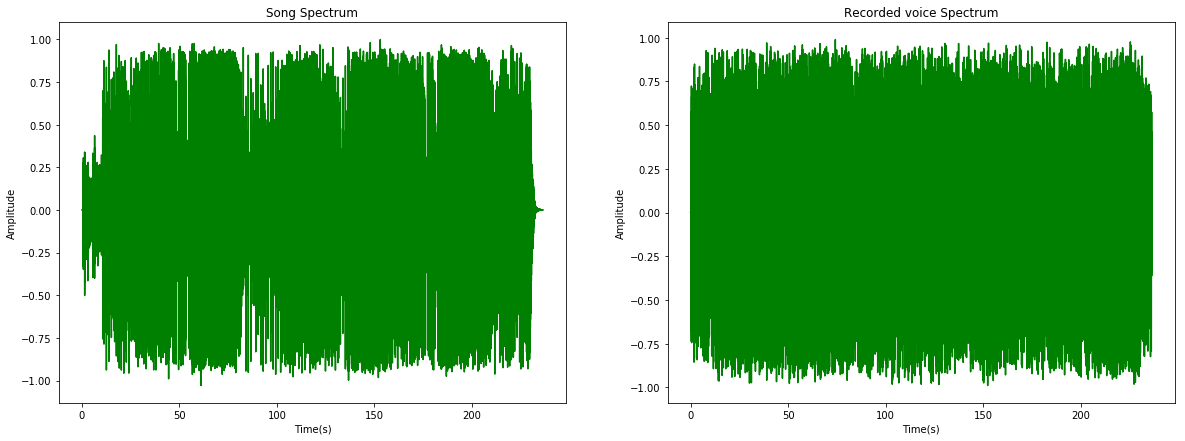

In [15]:
#                                                         plotting spectrum of song and voice 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
ax1.plot(time,song,'-',color='g',)
ax1.set(xlabel='Time(s)', ylabel='Amplitude')
ax1.set_title('Song Spectrum')
ax2.plot(timer,record,'-',color='g',)
ax2.set(xlabel='Time(s)', ylabel='Amplitude')
ax2.set_title('Recorded voice Spectrum')

In [16]:
                                               #Fitering positive frequencies of the sprectrum
test=[]
for i in song:
    if(i>0):
        test.append(i)
    else:
        test.append(0)
test1=[]
for i in record:
    if(i>0):
        test1.append(i)
    else:
        test1.append(0)

fsong=np.array(test)
frecord=np.array(test1)

Text(0.5, 1.0, 'Recorded voice')

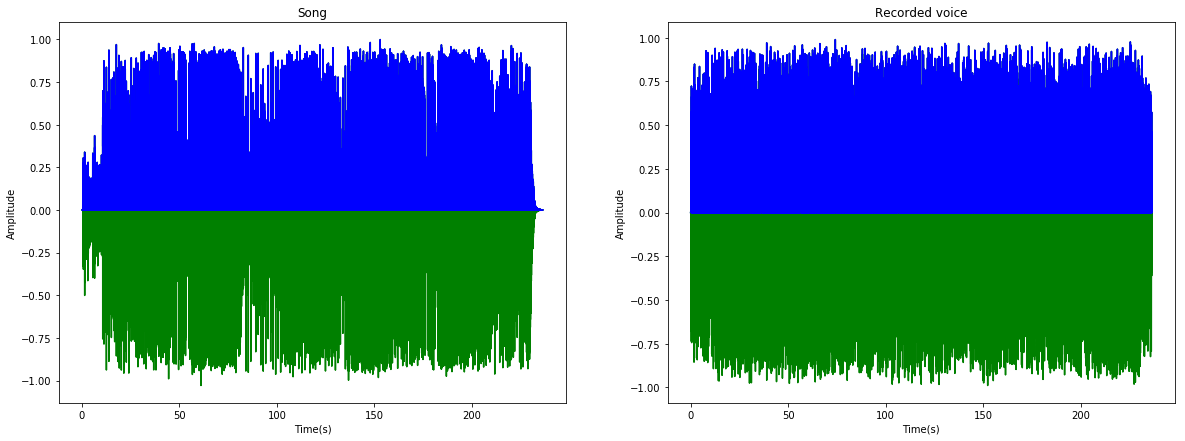

In [18]:
                                                                                   #Cross validation of positve frequencies
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 7))
ax1.plot(time,song,'-',color='g',)
ax1.plot(time,fsong,'-',color='b',)
ax1.set(xlabel='Time(s)', ylabel='Amplitude')
ax1.set_title('Song')
ax2.plot(timer,record,'-',color='g',)
ax2.plot(timer,frecord,'-',color='b',)
ax2.set(xlabel='Time(s)', ylabel='Amplitude')
ax2.set_title('Recorded voice')

Text(0.5, 1.0, 'Spectrum Analysis')

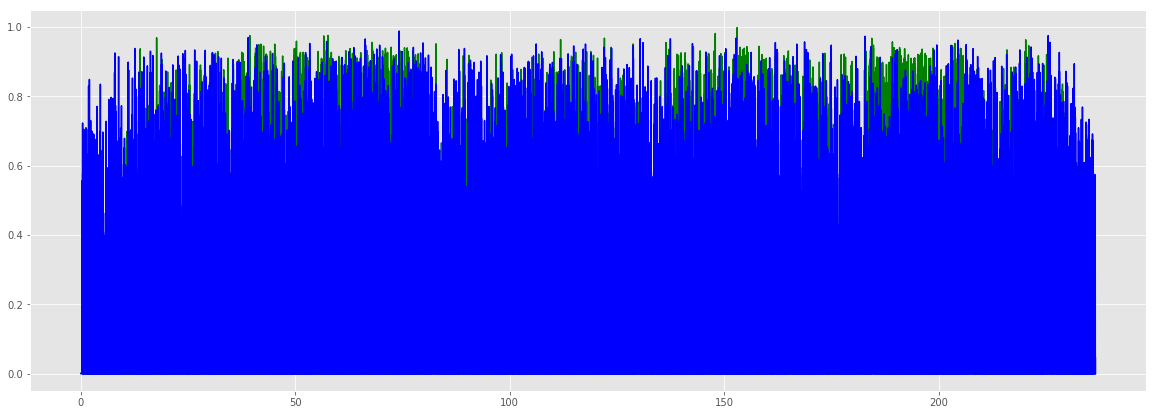

In [25]:
#                                                                         Final analysis of Spectrums
fig, ax = plt.subplots(1, figsize=(20, 7))
ax.plot(time,fsong,'-',color='g',)
ax.plot(timer,frecord,'-',color='b',)
ax1.set(xlabel='Time(s)', ylabel='Amplitude')
ax1.set_title('Spectrum Analysis')